In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

Import data

In [5]:
df=pd.read_excel("IA_House_Price_Original_Data.xlsx",skiprows=3)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 81,Unnamed: 82
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,NaN,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,NaN,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,NaN,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,NaN,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,NaN,NaN


Feature Encoding

In [6]:
#1 basement quality + transformation
bsmtqual_map={"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0}
df["BsmtQual_num"]=df["BsmtQual"].map(bsmtqual_map).fillna(0).astype(int)

Basement_quality=["BsmtQual_num"]

#Add 25 dummy variables to indicate whether the house is located in a certain neighborhood
Nei_num=pd.get_dummies(df["Neighborhood"],prefix="NBHD",dtype="int64")
Neighborhoods = df["Neighborhood"].unique()

Derive numerical features

In [7]:
#Add BsmtFinSF1 and BsmtFinSF2 to obtain total finished basement area
df["BsmtFinSF"] = df["BsmtFinSF1"].fillna(0) + df["BsmtFinSF2"].fillna(0)

col_select = ["LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","BsmtFinSF",
              "BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea",
              "FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd","Fireplaces",
              "GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch"]
Numerical_col = df[col_select]
Numerical_col

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,8450,7,5,2003,2003,706,150,856,856,854,...,2,1,3,8,0,2,548,0,61,0
1,9600,6,8,1976,1976,978,284,1262,1262,0,...,2,0,3,6,1,2,460,298,0,0
2,11250,7,5,2001,2002,486,434,920,920,866,...,2,1,3,6,1,2,608,0,42,0
3,9550,7,5,1915,1970,216,540,756,961,756,...,1,0,3,7,1,3,642,0,35,272
4,14260,8,5,2000,2000,655,490,1145,1145,1053,...,2,1,4,9,1,3,836,192,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,1936,4,7,1970,1970,0,546,546,546,546,...,1,1,3,5,0,0,0,0,0,0
2904,1894,4,5,1970,1970,252,294,546,546,546,...,1,1,3,6,0,1,286,0,24,0
2905,20000,5,7,1960,1996,1224,0,1224,1224,0,...,1,0,4,7,1,2,576,474,0,0
2906,10441,5,5,1992,1992,337,575,912,970,0,...,1,0,3,6,0,0,0,80,32,0


Analyze origingal numerical features

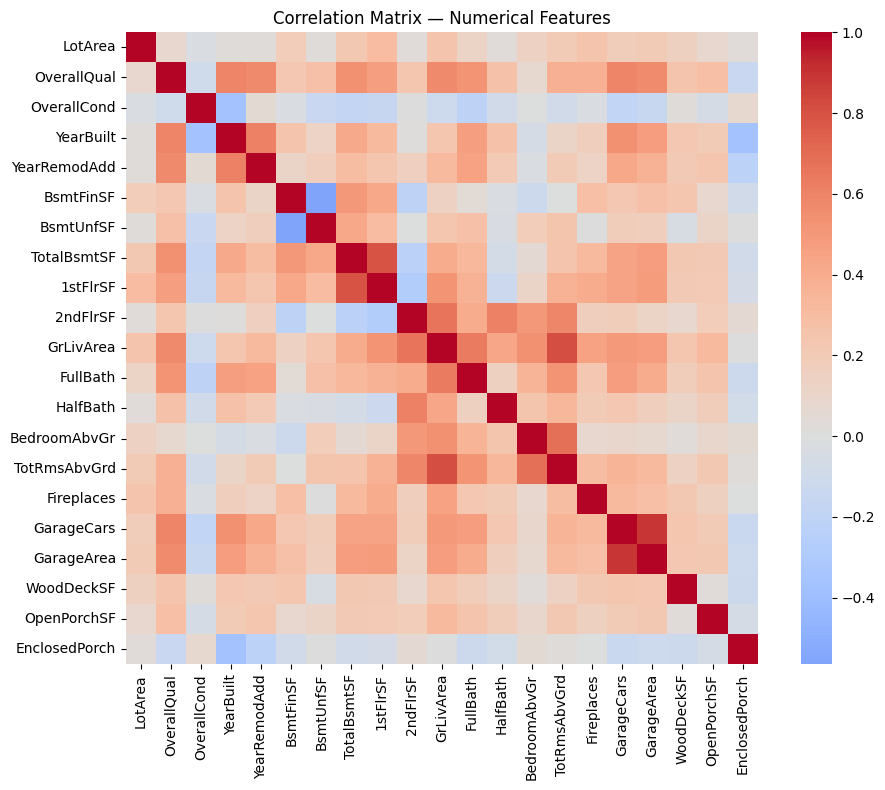

In [8]:
# Correlation matrix for numerical features
corr_num = Numerical_col.corr(method="pearson")
corr_num.round(3)
plt.figure(figsize=(10,8))
sns.heatmap(corr_num,annot=False,cmap="coolwarm",center=0,square=True)
plt.title("Correlation Matrix — Numerical Features")
plt.tight_layout()
plt.show()

Distribution of sale price

In [9]:
df["SalePrice"].describe()

,SalePrice
count,2908.000000
mean,180272.213549
std,78139.090808
min,12789.000000
25%,129362.500000
50%,160000.000000
75%,213310.000000
max,625000.000000


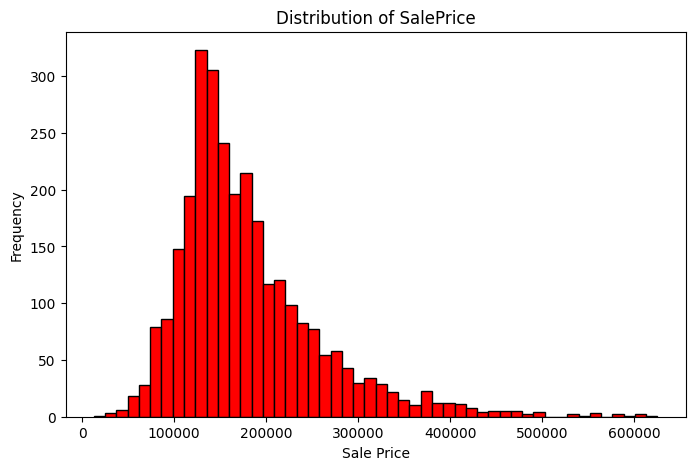

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(df["SalePrice"],bins=50,color="r",edgecolor="black")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrice")
plt.show()

Set independent variable and dependent variable

In [11]:
#Independent variable
X=pd.concat([Numerical_col,df[Basement_quality],Nei_num],axis=1)
X.info()
#Dependent variable
Y=np.log(df["SalePrice"]) #Makes right-skewed prices more normally distributed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2908 entries, 0 to 2907
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LotArea        2908 non-null   int64
 1   OverallQual    2908 non-null   int64
 2   OverallCond    2908 non-null   int64
 3   YearBuilt      2908 non-null   int64
 4   YearRemodAdd   2908 non-null   int64
 5   BsmtFinSF      2908 non-null   int64
 6   BsmtUnfSF      2908 non-null   int64
 7   TotalBsmtSF    2908 non-null   int64
 8   1stFlrSF       2908 non-null   int64
 9   2ndFlrSF       2908 non-null   int64
 10  GrLivArea      2908 non-null   int64
 11  FullBath       2908 non-null   int64
 12  HalfBath       2908 non-null   int64
 13  BedroomAbvGr   2908 non-null   int64
 14  TotRmsAbvGrd   2908 non-null   int64
 15  Fireplaces     2908 non-null   int64
 16  GarageCars     2908 non-null   int64
 17  GarageArea     2908 non-null   int64
 18  WoodDeckSF     2908 non-null   int64
 19  OpenPo

Detect missing value ratio

In [12]:
(X.isnull().sum()/len(X)).sort_values(ascending=False)

,0
LotArea,0.0
OverallQual,0.0
OverallCond,0.0
YearBuilt,0.0
YearRemodAdd,0.0
BsmtFinSF,0.0
BsmtUnfSF,0.0
TotalBsmtSF,0.0
1stFlrSF,0.0
2ndFlrSF,0.0


Separating X,Y into training/validation/test set randomly

In [13]:
rng = np.random.default_rng(1)#Lock the seed
index = rng.permutation(len(X))#Shuffle the data

train=index[:1800]
valid=index[1800:2400]
test=index[2400:]

X_train,Y_train=X.iloc[train],Y.iloc[train]
X_valid,Y_valid=X.iloc[valid],Y.iloc[valid]
X_test,Y_test=X.iloc[test],Y.iloc[test]

Normalize features

In [14]:
scaler=StandardScaler()
scale_cols=[
    "LotArea", "BsmtFinSF", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
    "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch"
]

X_train_scaled=X_train.copy()
scaler.fit(X_train_scaled[scale_cols])

X_train_scaled[scale_cols]=scaler.transform(X_train_scaled[scale_cols])

X_valid_scaled=X_valid.copy()
X_valid_scaled[scale_cols]=scaler.transform(X_valid_scaled[scale_cols])

X_test_scaled=X_test.copy()
X_test_scaled[scale_cols]=scaler.transform(X_test_scaled[scale_cols])

# Linear/Ridge/Lasso Regression

In [15]:
#Record the result of validation set
results=[]

In [16]:
#Linear regression
lr = LinearRegression()
lr.fit(X_train_scaled,Y_train)

Y_train_pred_lr=lr.predict(X_train_scaled)
Y_valid_pred_lr=lr.predict(X_valid_scaled)

mse_train_lr=mean_squared_error(Y_train,Y_train_pred_lr)
mse_valid_lr=mean_squared_error(Y_valid,Y_valid_pred_lr)

rmse_train_lr=np.sqrt(mse_train_lr)
rmse_valid_lr=np.sqrt(mse_valid_lr)

r2_train_lr=r2_score(Y_train,Y_train_pred_lr)
r2_valid_lr=r2_score(Y_valid,Y_valid_pred_lr)

result_lr=pd.DataFrame({
    "MSE": [mse_train_lr, mse_valid_lr],
    "RMSE": [rmse_train_lr, rmse_valid_lr],
    "R^2": [r2_train_lr, r2_valid_lr]
}, index=["train", "valid"])

print(result_lr)

            MSE      RMSE       R^2
train  0.013628  0.116741  0.913317
valid  0.015038  0.122628  0.911614


In [17]:
#L2: Ridge regression
penalty_l2 = [0.10, 0.30, 0.60]

for i in penalty_l2:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_scaled, Y_train)

    Y_train_pred_l2 = ridge.predict(X_train_scaled)
    Y_valid_pred_l2 = ridge.predict(X_valid_scaled)

    mse_train_l2 = mean_squared_error(Y_train, Y_train_pred_l2)
    mse_valid_l2 = mean_squared_error(Y_valid, Y_valid_pred_l2)

    rmse_train_l2 = np.sqrt(mse_train_l2)
    rmse_valid_l2 = np.sqrt(mse_valid_l2)

    r2_train_l2 = r2_score(Y_train, Y_train_pred_l2)
    r2_valid_l2 = r2_score(Y_valid, Y_valid_pred_l2)

    result_ridge = pd.DataFrame({
        "MSE": [mse_train_l2, mse_valid_l2],
        "RMSE": [rmse_train_l2, rmse_valid_l2],
        "R^2": [r2_train_l2, r2_valid_l2]
    }, index=["train", "valid"])

    print(f"\nL2 (Ridge) with lambda = {i}")
    print(result_ridge)

    results.append({
        "Model": "Ridge",
        "lambda": i,
        "Valid_MSE": mse_valid_l2,
        "Valid_RMSE": rmse_valid_l2,
        "Valid_R2": r2_valid_l2
    })


L2 (Ridge) with lambda = 0.1
            MSE      RMSE       R^2
train  0.013628  0.116741  0.913317
valid  0.015038  0.122628  0.911613

L2 (Ridge) with lambda = 0.3
            MSE      RMSE       R^2
train  0.013629  0.116742  0.913315
valid  0.015038  0.122630  0.911611

L2 (Ridge) with lambda = 0.6
            MSE      RMSE       R^2
train  0.013630  0.116746  0.913309
valid  0.015039  0.122635  0.911604


In [18]:
#L1: Lasso regression
penalty_l1 = [0.02, 0.06, 0.10]

for i in penalty_l1:
    lasso = Lasso(alpha=i, max_iter=200000)
    lasso.fit(X_train_scaled, Y_train)

    Y_train_pred_l1 = lasso.predict(X_train_scaled)
    Y_valid_pred_l1 = lasso.predict(X_valid_scaled)

    mse_train_l1 = mean_squared_error(Y_train, Y_train_pred_l1)
    mse_valid_l1 = mean_squared_error(Y_valid, Y_valid_pred_l1)

    rmse_train_l1 = np.sqrt(mse_train_l1)
    rmse_valid_l1 = np.sqrt(mse_valid_l1)

    r2_train_l1 = r2_score(Y_train, Y_train_pred_l1)
    r2_valid_l1 = r2_score(Y_valid, Y_valid_pred_l1)

    result_lasso = pd.DataFrame({
        "MSE": [mse_train_l1, mse_valid_l1],
        "RMSE": [rmse_train_l1, rmse_valid_l1],
        "R^2": [r2_train_l1, r2_valid_l1]
    }, index=["train", "valid"])

    print(f"\nL1 (Lasso) with lambda = {i}")
    print(result_lasso)

    results.append({
        "Model": "Lasso",
        "lambda": i,
        "Valid_MSE": mse_valid_l1,
        "Valid_RMSE": rmse_valid_l1,
        "Valid_R2": r2_valid_l1
    })




L1 (Lasso) with lambda = 0.02
            MSE      RMSE       R^2
train  0.018103  0.134546  0.884859
valid  0.020046  0.141584  0.882175

L1 (Lasso) with lambda = 0.06
            MSE      RMSE       R^2
train  0.028419  0.168578  0.819244
valid  0.030117  0.173544  0.822979

L1 (Lasso) with lambda = 0.1
            MSE      RMSE       R^2
train  0.041204  0.202988  0.737924
valid  0.042904  0.207132  0.747827


In [19]:
#Order the results by MSE of validation set
df_results=pd.DataFrame(results).sort_values(by="Valid_MSE").reset_index(drop=True)
print(df_results)

   Model  lambda  Valid_MSE  Valid_RMSE  Valid_R2
0  Ridge    0.10   0.015038    0.122628  0.911613
1  Ridge    0.30   0.015038    0.122630  0.911611
2  Ridge    0.60   0.015039    0.122635  0.911604
3  Lasso    0.02   0.020046    0.141584  0.882175
4  Lasso    0.06   0.030117    0.173544  0.822979
5  Lasso    0.10   0.042904    0.207132  0.747827


# Evaluation the best model —— Ridge Regression with lambda=0.10

In [20]:
ridge = Ridge(alpha=0.10)
ridge.fit(X_train_scaled, Y_train)

Y_test_pred_l2 = ridge.predict(X_test_scaled)

mse_test_l2 = mean_squared_error(Y_test, Y_test_pred_l2)
mae_test_l2 = mean_absolute_error(Y_test, Y_test_pred_l2)
rmse_test_l2 = np.sqrt(mse_test_l2)
r2_l2 = r2_score(Y_test, Y_test_pred_l2)

print("Test MSE:", mse_test_l2)
print("Test RMSE:", rmse_test_l2)
print("Test MAE:", mae_test_l2)
print("Test R^2:", r2_l2)

Test MSE: 0.015902680799134882
Test RMSE: 0.1261058317411803
Test MAE: 0.08789602483588116
Test R^2: 0.9051882010136519


Plot the coefficient bar chart

NBHD_MeadowV    -0.176488
NBHD_BrDale     -0.156789
NBHD_Crawfor     0.134716
NBHD_StoneBr     0.126978
NBHD_NridgHt     0.101608
NBHD_Blueste    -0.094548
NBHD_ClearCr     0.091268
NBHD_NPkVill    -0.069606
OverallQual      0.068957
GrLivArea        0.060266
1stFlrSF         0.060102
2ndFlrSF         0.053924
OverallCond      0.053549
NBHD_NoRidge     0.051403
NBHD_OldTown    -0.041655
NBHD_Somerst     0.039943
NBHD_Timber      0.038229
BsmtFinSF        0.037905
NBHD_NWAmes     -0.036670
TotalBsmtSF      0.036264
NBHD_SawyerW    -0.026921
NBHD_IDOTRR     -0.026419
GarageArea       0.024925
NBHD_Blmngtn    -0.024050
Fireplaces       0.023946
GarageCars       0.023145
BsmtQual_num     0.022063
NBHD_Gilbert     0.019810
LotArea          0.018700
NBHD_BrkSide     0.017983
NBHD_CollgCr     0.017067
NBHD_Mitchel    -0.015476
NBHD_SWISU       0.015413
HalfBath         0.013589
EnclosedPorch    0.011865
OpenPorchSF      0.011068
NBHD_NAmes       0.010526
NBHD_Veenker     0.008339
WoodDeckSF  

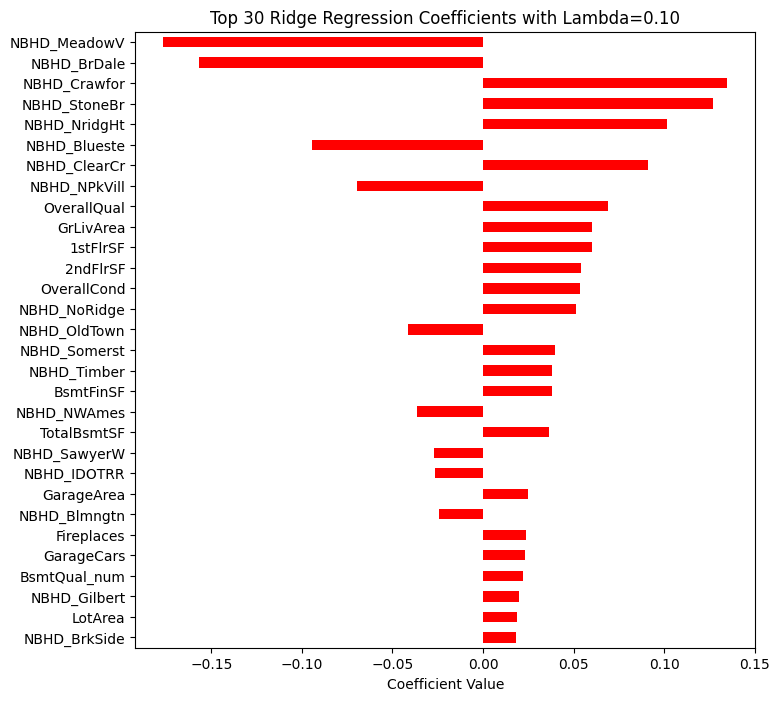

In [21]:
coef_series=pd.Series(ridge.coef_, index=X_train.columns)
coef_sorted=coef_series.reindex(coef_series.abs().sort_values(ascending=False).index)
print(coef_sorted)

plt.figure(figsize=(8, 8))
coef_sorted.head(30).plot(kind="barh",color="r")
plt.xlabel("Coefficient Value")
plt.title("Top 30 Ridge Regression Coefficients with Lambda=0.10")
plt.gca().invert_yaxis()
plt.show()

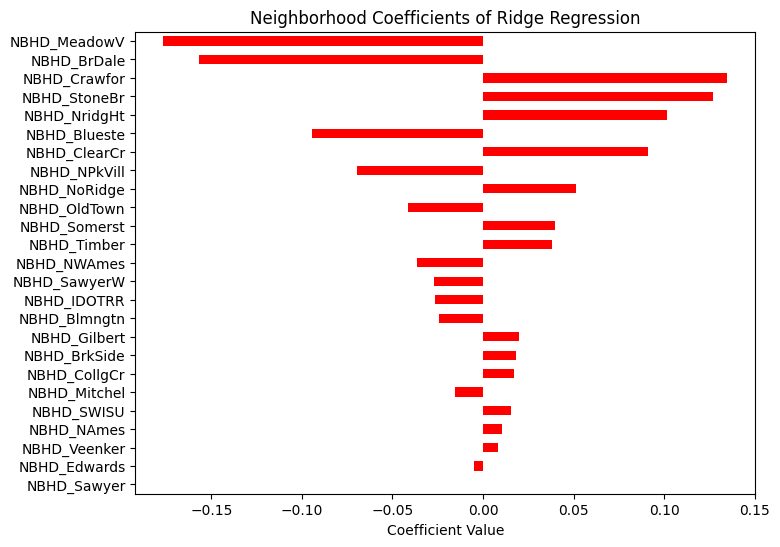

In [22]:
coef_series = pd.Series(ridge.coef_, index=X_train.columns)
coef_only_nei = coef_series[coef_series.index.isin(Nei_num.columns)]
coef_sorted = coef_only_nei.reindex(coef_only_nei.abs().sort_values(ascending=False).index)

plt.figure(figsize=(8, 6))
coef_sorted.plot(kind="barh", color="r")
plt.xlabel("Coefficient Value")
plt.title("Neighborhood Coefficients of Ridge Regression")
plt.gca().invert_yaxis()
plt.show()

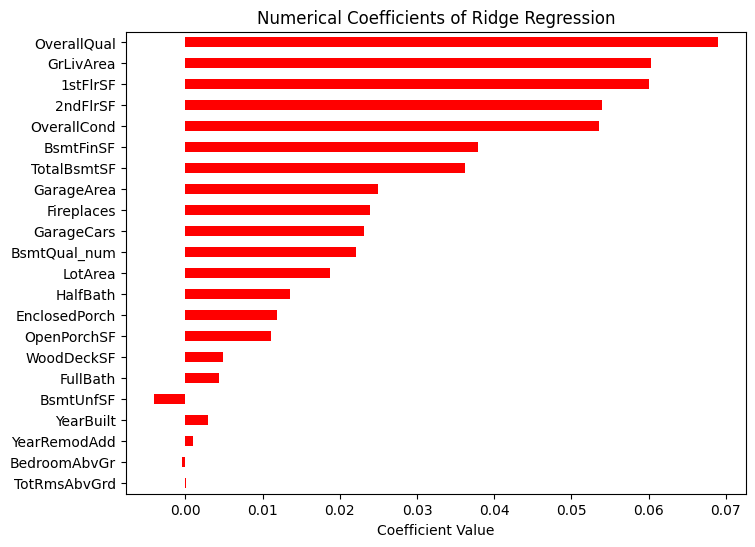

In [23]:
coef_series=pd.Series(ridge.coef_, index=X_train.columns)
coef_no_nei=coef_series[~coef_series.index.isin(Nei_num.columns)]
coef_sorted=coef_no_nei.reindex(coef_no_nei.abs().sort_values(ascending=False).index)

plt.figure(figsize=(8,6))
coef_sorted.plot(kind="barh",color="r")
plt.xlabel("Coefficient Value")
plt.title("Numerical Coefficients of Ridge Regression")
plt.gca().invert_yaxis()
plt.show()

In [27]:
# Predict real-time house price in Iowa using data on Zillow.com
T_input = {
    'LotArea': 9583.2,
    'OverallQual': 8,
    'OverallCond': 8,
    'YearBuilt': 2003,
    'YearRemodAdd': 2003,
    'BsmtFinSF': 1434,
    'BsmtUnfSF': 0,
    'TotalBsmtSF': 1434,
    '1stFlrSF': 1491,
    '2ndFlrSF': 1000,
    'GrLivArea': 2491,
    'FullBath': 2,
    'HalfBath': 2,
    'BedroomAbvGr': 4,
    'TotRmsAbvGrd': 15,
    'Fireplaces': 2,
    'GarageCars': 2,
    'GarageArea': 600,
    'WoodDeckSF': 0,
    'OpenPorchSF': 200,
    'EnclosedPorch': 0,
    'BsmtQual_num': 5,
    'NBHD_Blmngtn': 0,
    'NBHD_Blueste': 0,
    'NBHD_BrDale': 0,
    'NBHD_BrkSide': 0,
    'NBHD_ClearCr': 0,
    'NBHD_CollgCr': 0,
    'NBHD_Crawfor': 0,
    'NBHD_Edwards': 0,
    'NBHD_Gilbert': 0,
    'NBHD_IDOTRR': 0,
    'NBHD_MeadowV': 0,
    'NBHD_Mitchel': 1,
    'NBHD_NAmes': 0,
    'NBHD_NPkVill': 0,
    'NBHD_NWAmes': 0,
    'NBHD_NoRidge': 0,
    'NBHD_NridgHt': 0,
    'NBHD_OldTown': 0,
    'NBHD_SWISU': 0,
    'NBHD_Sawyer': 0,
    'NBHD_SawyerW': 0,
    'NBHD_Somerst': 0,
    'NBHD_StoneBr': 0,
    'NBHD_Timber': 0,
    'NBHD_Veenker': 0
}
T = pd.DataFrame([T_input])
T
T_scaled = T.copy()
T_scaled[scale_cols] = scaler.transform(T_scaled[scale_cols])
T_scaled
yhat_log = ridge.predict(T_scaled)
yhat = float(np.exp(yhat_log))
yhat
# 468000 https://www.zillow.com/homedetails/316-Topaz-Ct-Ames-IA-50010/93957355_zpid/

/tmp/ipython-input-3303063004.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yhat = float(np.exp(yhat_log))


392321.13697010395